In [111]:
import pyfiles.HFSAnalyzer as HFSAnalyzer
reload(HFSAnalyzer)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSAnalyzer.directory_to_df()
df = df.sort_values(by='Nk')

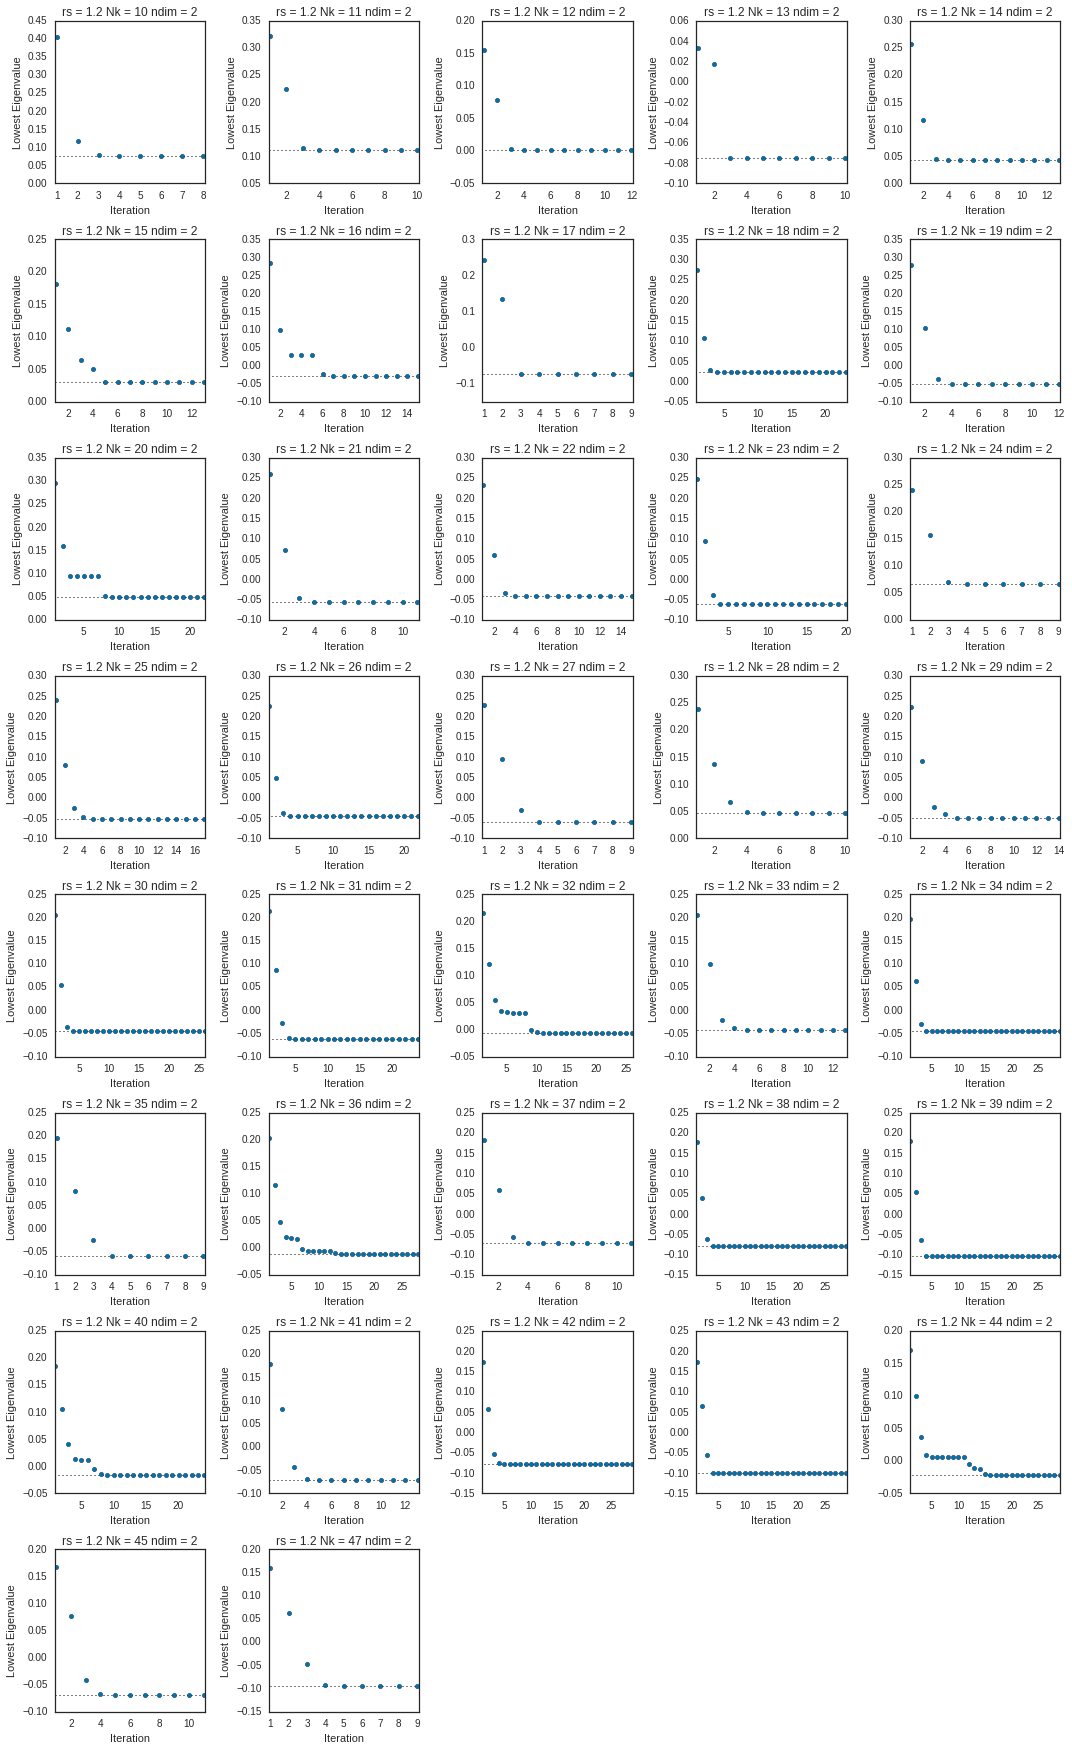

In [112]:
"""
fig = plt.figure()
fig, axes = HFSAnalyzer.df_ApplyAxplotToRows(df, None, HFSAnalyzer.axplot_1stBZ, 
                                             spec_alpha=0.5, scale=1.05, labels=False)

plt.tight_layout()
plt.show()
"""

"""
fig = plt.figure()
fig, axes =  HFSAnalyzer.df_ApplyAxplotToRows(df[:5], None, HFSAnalyzer.axplot_exc_hist)
plt.tight_layout()
plt.show()
"""

fig = plt.figure()
fig, axes = HFSAnalyzer.df_ApplyAxplotToRows(df, [9,5], HFSAnalyzer.axplot_dav_convergence_wrt_its)
plt.tight_layout()
plt.show()

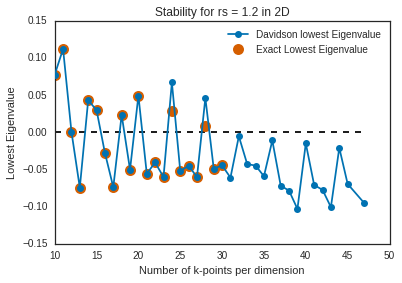

In [119]:
plt.figure()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
Nks_full = df_with_fulldiags.Nk.as_matrix()
davmins = df.Dav_Final_Val.as_matrix()
Nks = df.Nk.as_matrix()
fullmins= df_with_fulldiags.full_diag_min.as_matrix()
zeros = np.zeros(len(davmins))
plt.title('Stability for rs = 1.2 in 2D')
plt.xlabel("Number of k-points per dimension")
plt.ylabel('Lowest Eigenvalue')
plt.plot(Nks, zeros   , 'k--', zorder=1)
plt.plot(Nks, davmins , '-o' , zorder=3, label='Davidson lowest Eigenvalue')
plt.plot(Nks_full, fullmins, 'o' , markersize=11, c=sns.color_palette()[2], zorder=2, label='Exact Lowest Eigenvalue')
plt.legend()
plt.show()

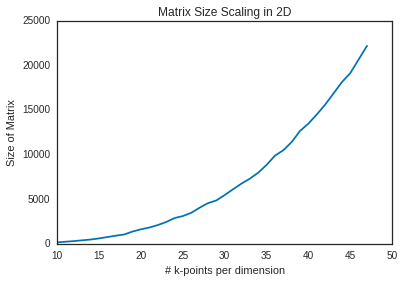

In [114]:
plt.figure()
Nexcs = df.Nexc.as_matrix()
Nks = df.Nk.as_matrix()
plt.plot(Nks, 2*Nexcs)
plt.xlabel('# k-points per dimension')
plt.ylabel('Size of Matrix')
plt.title('Matrix Size Scaling in 2D')
plt.show()

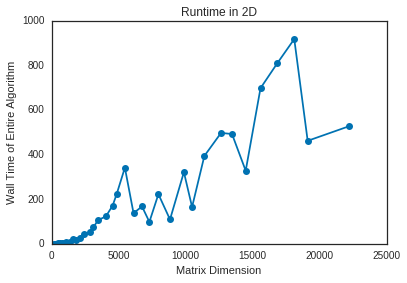

In [115]:
Walltime = [float(s.split()[0]) for s in df['Total Elapsed Time']]
Nexcs = df.Nexc.as_matrix()
plt.title('Runtime in 2D')
plt.xlabel('Matrix Dimension')
plt.ylabel('Wall Time of Entire Algorithm')
plt.plot(2*Nexcs, Walltime, 'o-')

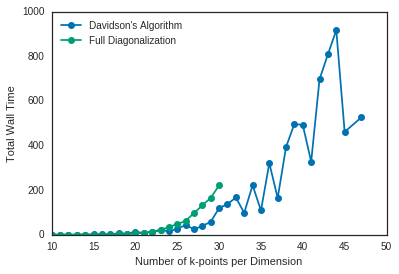

In [116]:
Nks =  df.Nk.as_matrix()
Davtimes =  df.Dav_time.as_matrix()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
fulltimes = df_with_fulldiags.full_diag_time.as_matrix()
Nkfull = df_with_fulldiags.Nk.as_matrix()

plt.figure()
plt.plot(Nks, Davtimes, '-o', label="Davidson's Algorithm")
plt.plot(Nkfull, fulltimes, '-o', label='Full Diagonalization')
plt.xlabel('Number of k-points per Dimension')
plt.ylabel('Total Wall Time')
plt.legend(loc='best')
plt.show()

In [117]:
for i in df.columns:
    print i

Computation Started
Computation Finished
Nk
ndim
rs
deltaK
kf
kmax
Nocc
Nvir
Nexc
dav_its
num_guess_evecs
Dav_blocksize
Dav_Num_evals
Dav_time
Mv_time
Davidson_Stopping_Criteria
Dav_Final_Val
full_diag_min
full_diag_time
Total Elapsed Time
Davidson Tolerance
Dav_minits
Dav_maxits
Dav_maxsubsize
Occ Energies
Vir Energies
Excitation Energies
Kgrid
All Davidson Eigenvalues at Last Iteration
Davidson lowest eigenvalues at each iteration
Davidson Times Per Iteration
Occupied States
Virtual States
Excitations


(0, 1.620489718)

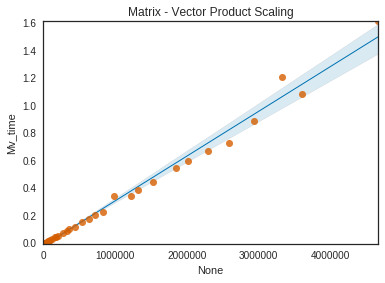

In [118]:
plt.figure()
Nexcs = df['Nexc']
Noccs = df['Nocc']
mvtimes = df['Mv_time']

plt.xlabel('Nexc x Nocc')
plt.ylabel('Execution Time')
plt.title('Matrix - Vector Product Scaling')

sns.regplot(Nexcs*Noccs, mvtimes, scatter_kws={'color' : sns.color_palette()[2], 's' : 50, 'zorder' : 2}
                                , line_kws={'zorder' : 1, 'linewidth' : 1})

plt.xlim(0, np.amax(Nexcs * Noccs))
plt.ylim(0, np.amax(mvtimes))